In [14]:
import sys
sys.path.insert(0,'..') if '..' not in sys.path else _;
%load_ext autoreload
%autoreload 2

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import fredapi as f

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
from Helpers.FRACTALS import *

In [17]:
import matplotlib as m
from datetime import datetime
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [18]:
from secret import akey
fred = f.Fred(api_key=akey)

In [19]:
# https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM
# Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in U.S. Dollars
df = pd.DataFrame(fred.get_series('DEXUSAL'),columns=['aud'])
df.to_csv(os.path.join('..','Data','aud' +'_'+ \
                       datetime.today().strftime('%Y%m%d')+'.csv'))
df = df.fillna(method='pad',limit=4)
# gold etf volatility index # CBOE Gold ETF Volatility Index
#getfvol = fred.get_series(series_id='GVZCLS')

In [7]:
df = df['1980':]

In [8]:
df.describe()

,aud
count,10194.000000
mean,0.791824
std,0.150047
min,0.482800
25%,0.704050
50%,0.763500
75%,0.878000
max,1.189000


In [9]:
df.tail()

,aud
2019-01-21,0.7172
2019-01-22,0.7133
2019-01-23,0.7133
2019-01-24,0.7096
2019-01-25,0.7172


In [20]:
test = computeFractalsAndHurst(df,'aud')

In [22]:
test.tail()

,aud,14d_RS,34d_RS,55d_RS,89d_RS,180d_RS,14d_RS_mean,34d_RS_mean,55d_RS_mean,89d_RS_mean,180d_RS_mean,HurstExponent,14d_fractal,34d_fractal,55d_fractal,89d_fractal,180d_fractal
2019-01-21,0.7172,5.352578,14.223645,20.914678,27.510374,72.460119,5.719334,13.807621,22.440699,31.381140,74.322772,0.983771,1.149107,1.407242,1.817844,1.667333,1.530274
2019-01-22,0.7133,5.202768,14.773675,21.003322,28.294281,72.280541,5.699870,13.801453,22.447845,31.215176,74.265672,0.984057,1.322773,1.586228,1.536568,1.593286,1.492924
2019-01-23,0.7133,6.049842,14.635200,20.892465,29.126438,72.078639,5.697750,13.794409,22.447808,31.062555,74.207340,0.983313,1.760431,1.604796,1.529253,1.590008,1.490754
2019-01-24,0.7096,5.943846,14.232111,20.801265,30.115536,71.857904,5.698440,13.779597,22.449128,30.927644,74.146485,0.982527,1.525338,1.554579,1.563858,1.560174,1.472185
2019-01-25,0.7172,5.430112,14.221081,20.619472,30.758246,71.605212,5.693265,13.763520,22.449518,30.803805,74.083039,0.982153,1.722962,1.887313,1.799257,1.734804,1.485402


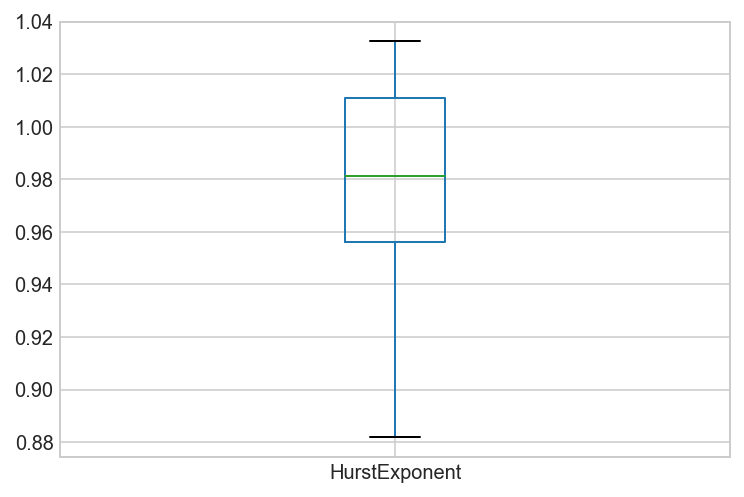

In [48]:
test['HurstExponent']['2007'].plot.box()

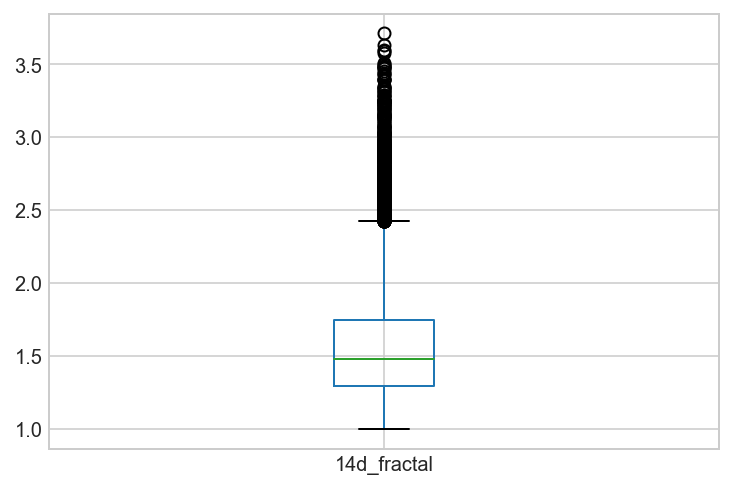

In [26]:
test['14d_fractal'].plot.box()

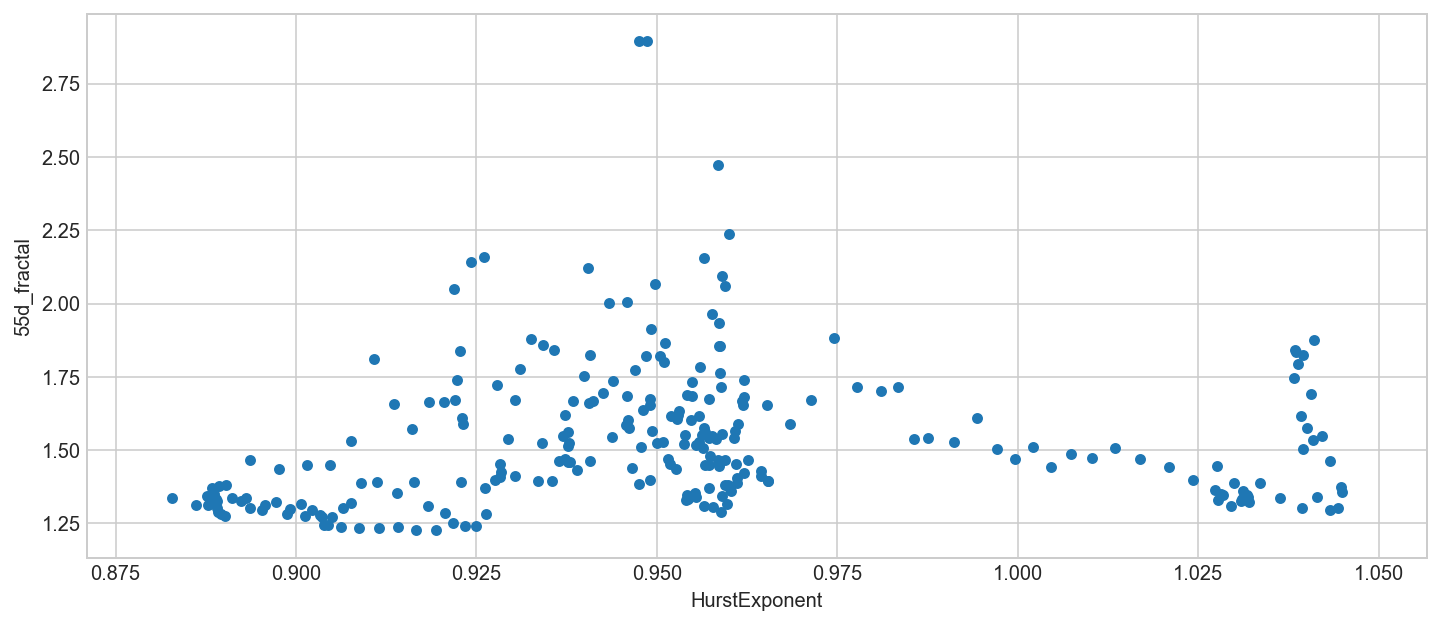

In [57]:
test['2017'][['HurstExponent','55d_fractal']].\
    plot.scatter(x='HurstExponent',y='55d_fractal',figsize=[12,5])

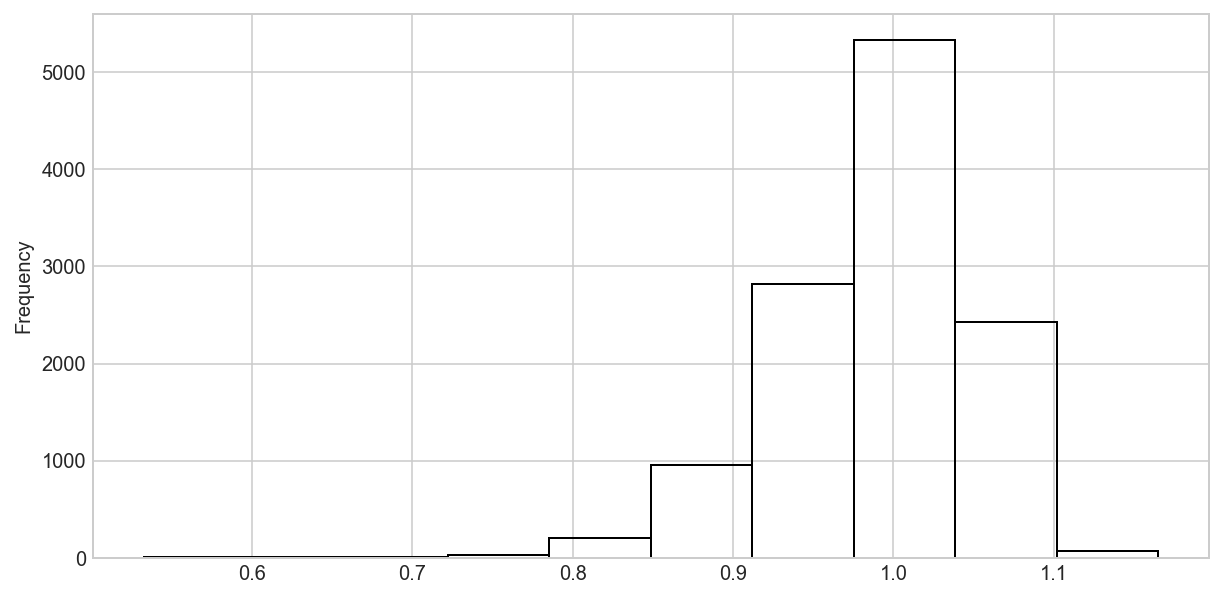

In [41]:
test['HurstExponent'].plot.hist(figsize=[10,5],fill=False)

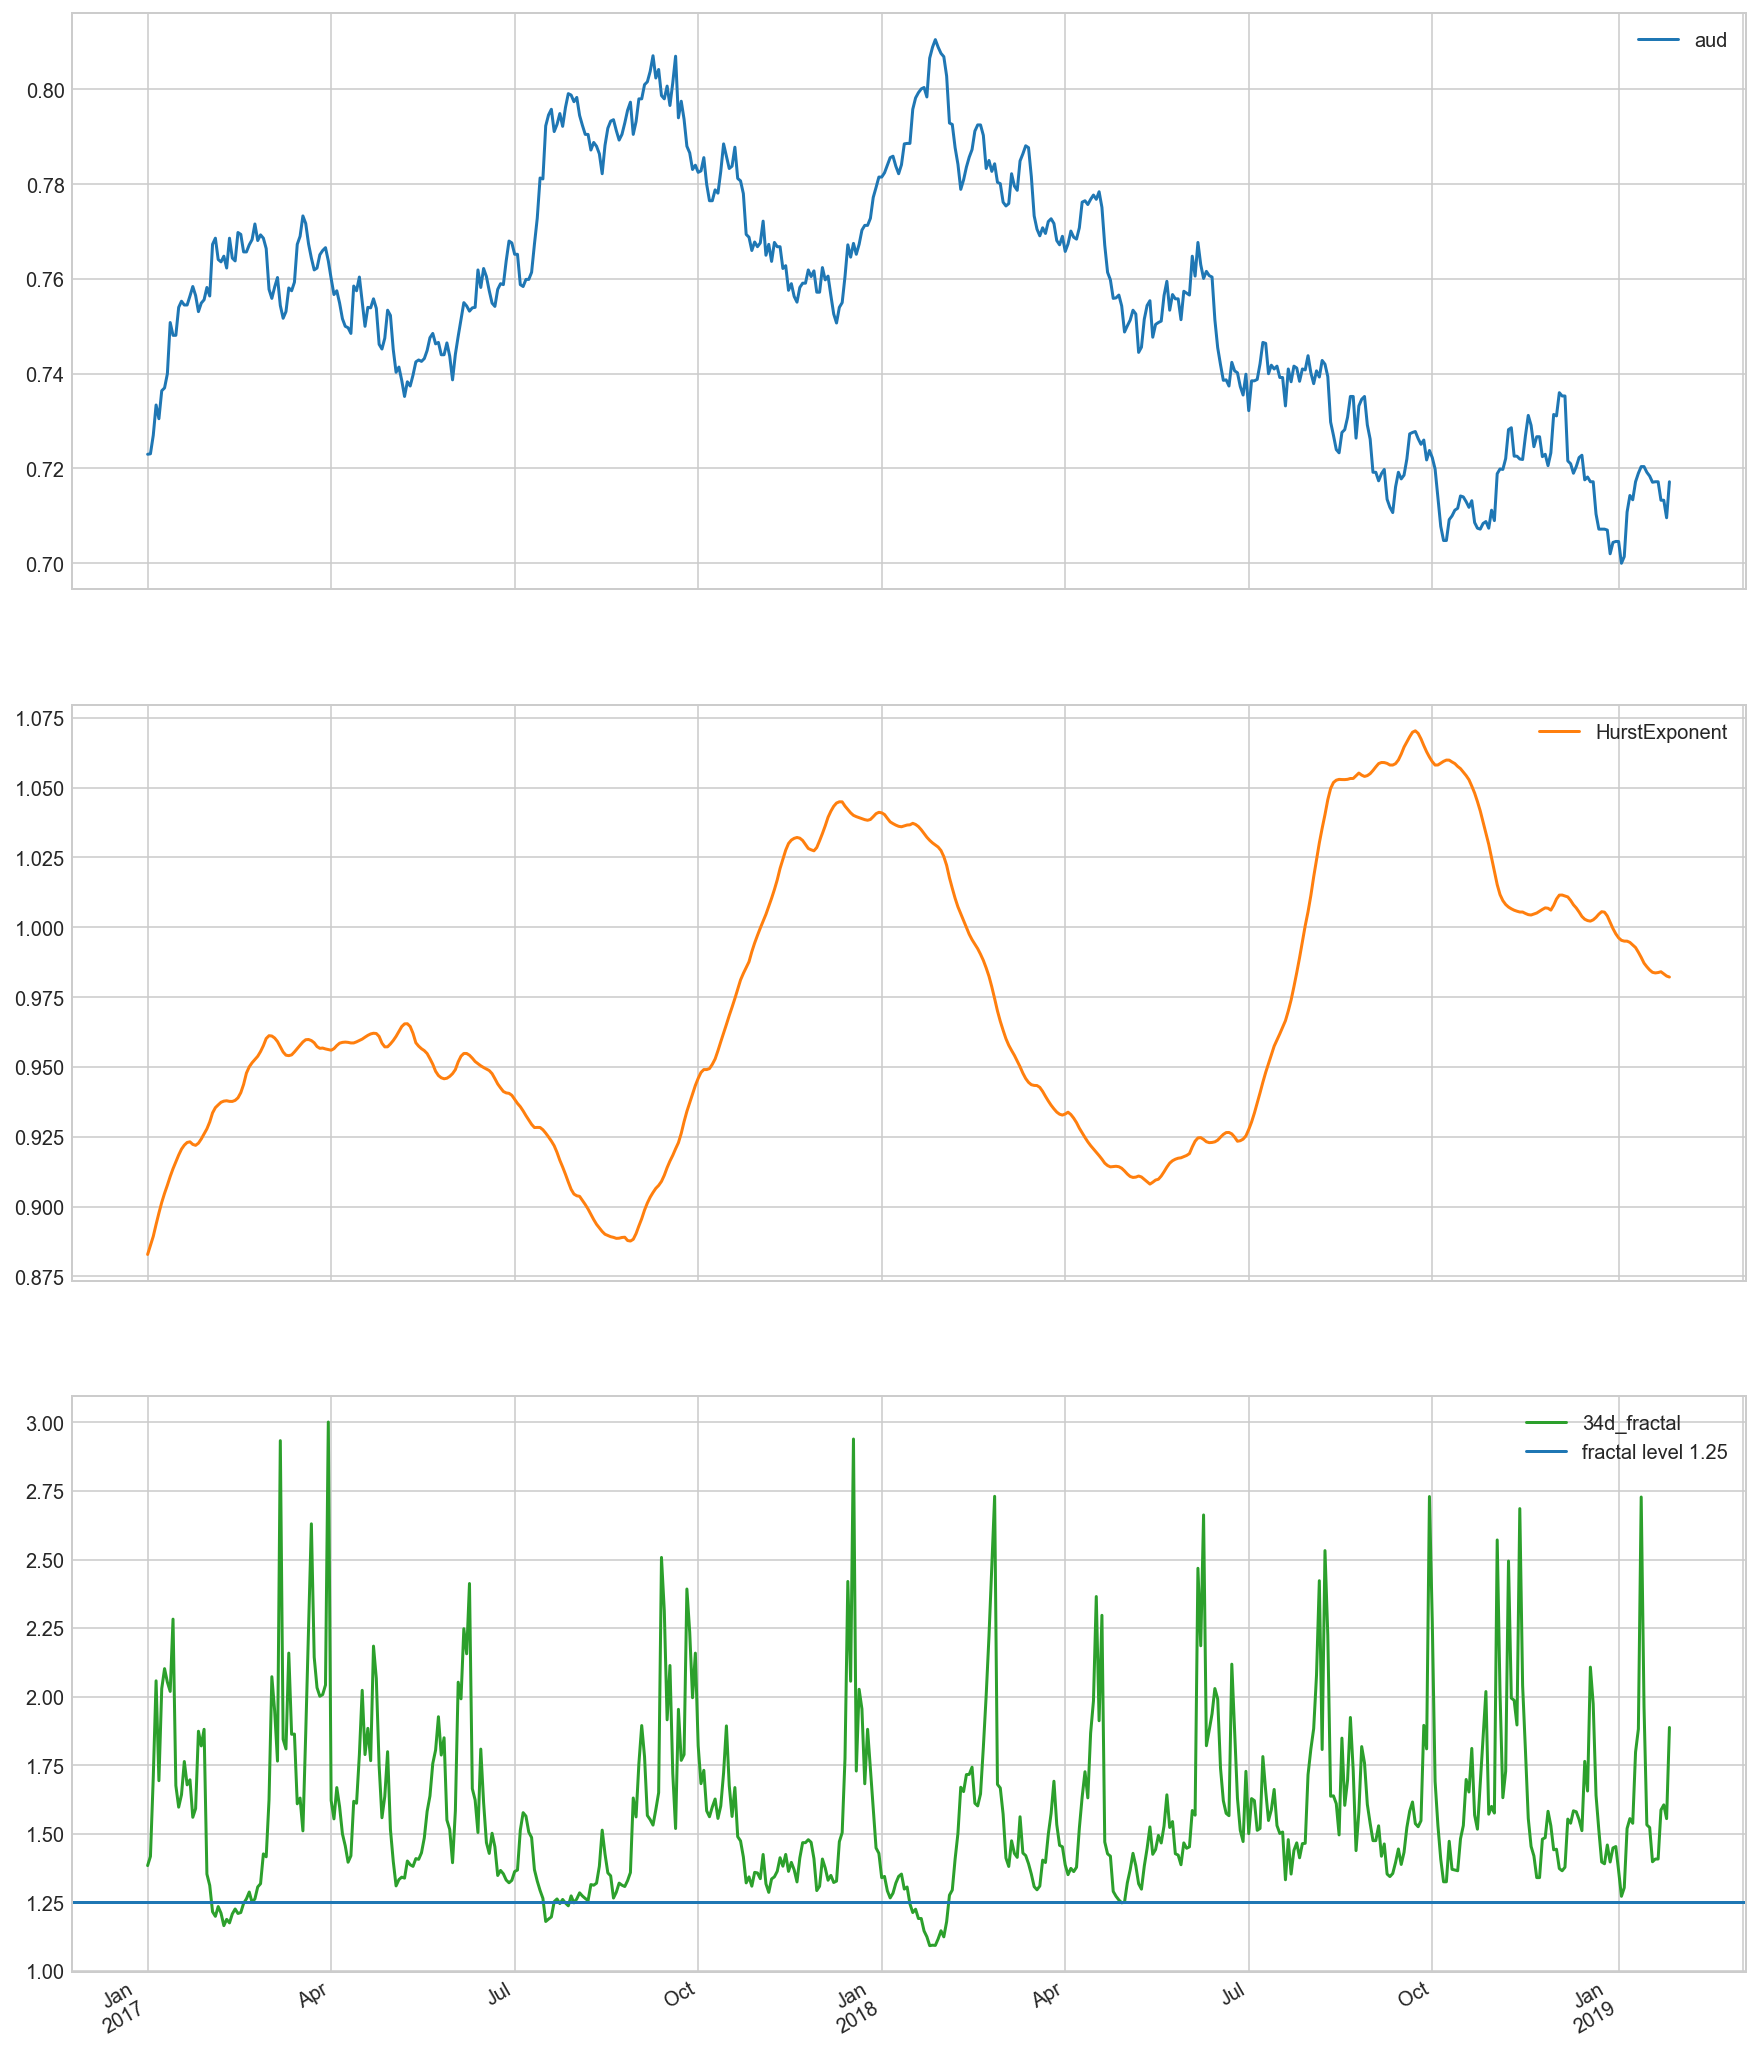

In [55]:
ax = test[['aud', 'HurstExponent','34d_fractal']]['2017':].\
    plot(figsize=[15,20],subplots=True);
ax[2].axhline(y=1.25,label = 'fractal level 1.25');
ax[2].legend()

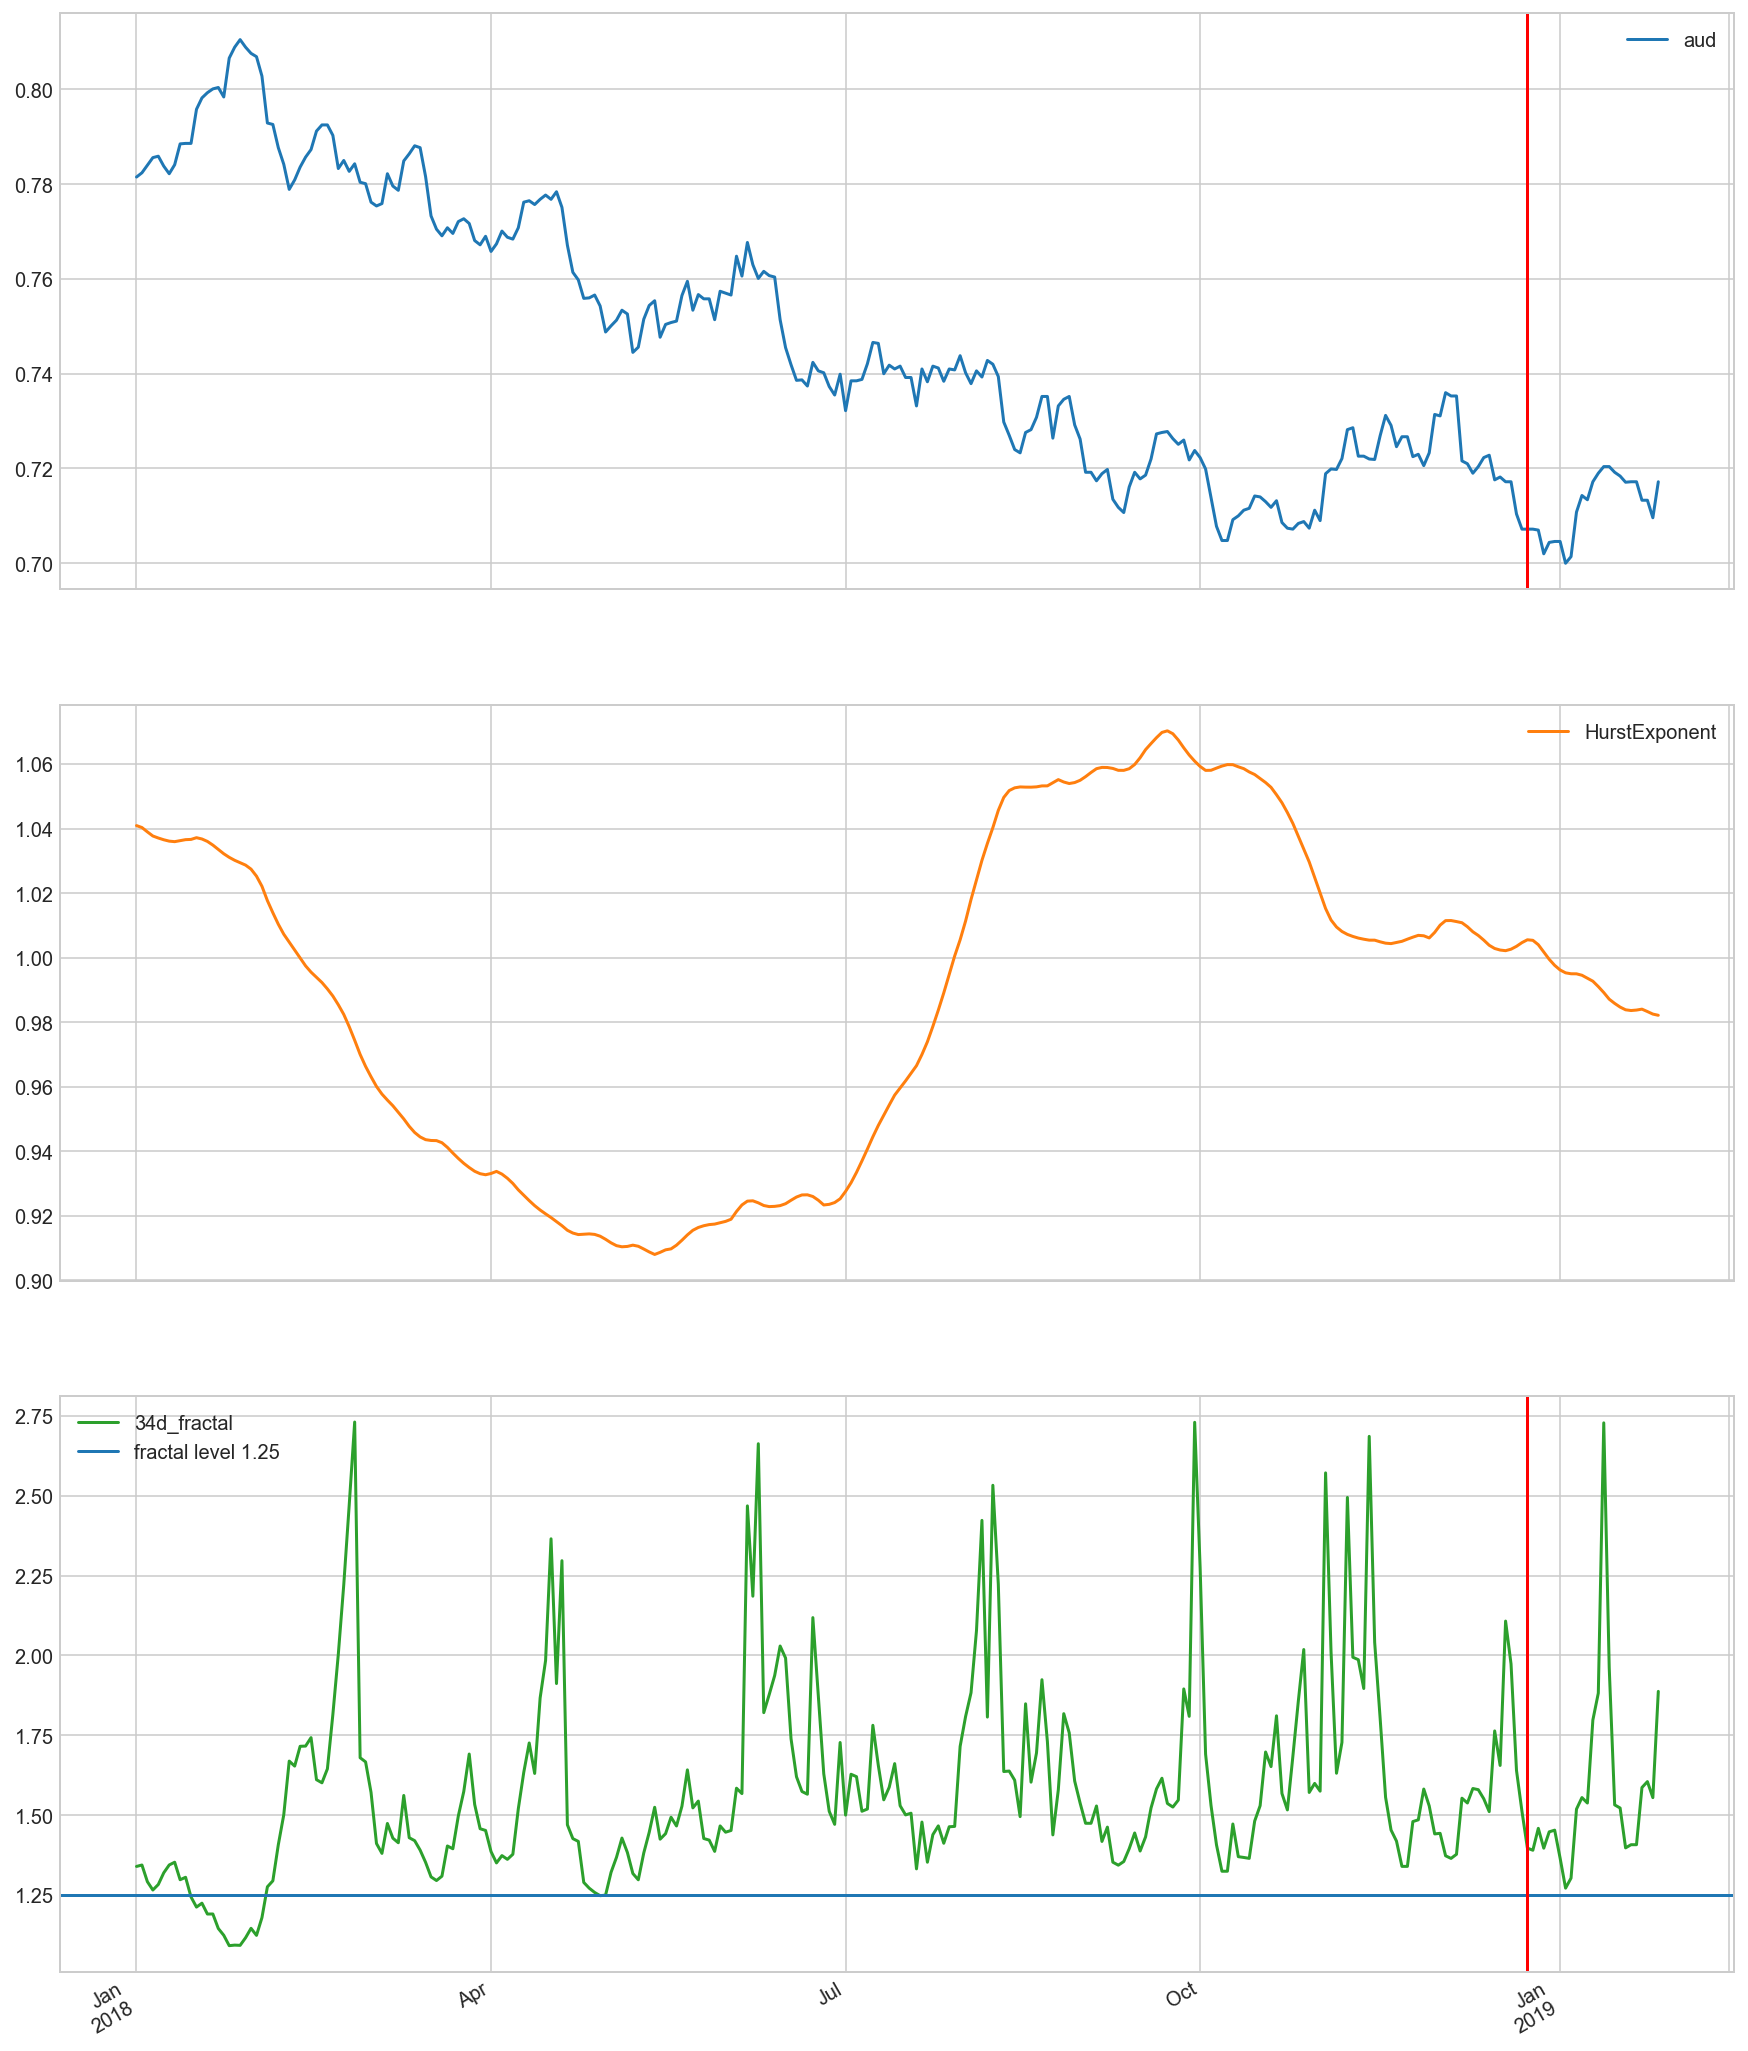

In [61]:
ax = test[['aud', 'HurstExponent','34d_fractal']]['2018':].\
    plot(figsize=[15,20],subplots=True);
ax[0].axvline(x='2018-12-24',color = 'red');
ax[2].axhline(y=1.25,label = 'fractal level 1.25');
ax[2].axvline(x='2018-12-24',color = 'red');
ax[2].legend();